In [1]:
# importing libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import re

In [17]:
# loading data by using glob  & loop & concatenation all csv files
files = glob("states*")
us_census = pd.concat((pd.read_csv(file) for file in files ),ignore_index=True)
del us_census["Unnamed: 0"]
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [3]:
# look .dtypes and .columns
d_types=us_census.dtypes
print("Data types of us_census : \n",d_types)
print('___________________________________')
col= us_census.columns
print("Column of us_census : \n",col)

Data types of us_census : 
 State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object
___________________________________
Column of us_census : 
 Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')


In [4]:
# task 4 : look at the Data head Frame dtypes
#so that you can understand why some of these dtypes are objects
#instead of integers or floats.
us_census.head(2).dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

In [5]:
# Use regex to turn the Income column into a format 
# that is ready for conversion into a numerical type
us_census["Income"]=us_census["Income"].replace("\$"," ",regex=True)
us_census['Income'] = us_census['Income'].astype("float")
print("After conversion the Data type of income columns is  : ",us_census['Income'].dtypes)


After conversion the Data type of income columns is  :  float64


In [6]:
#Look at the GenderPop column
#going to separate this into two columns, the Men column, and the Women column.
us_census['GenderPop'][0]

'2341093M_2489527F'

In [7]:
# Split the column into those two new columns 
#using str.split and separating out columns in to male and female.
# Convert both of the columns into numerical datatypes.

split_gender = us_census['GenderPop'].str.split('_', expand=True)
us_census["female"]=split_gender[1].str.extract('(\d+)',expand=True)
us_census["female"]=pd.to_numeric(us_census["female"])
us_census["Male"]=split_gender[0].str.extract('(\d+)',expand=True)
us_census["Male"]=pd.to_numeric(us_census["Male"])


In [8]:
us_census.dtypes

State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income       float64
GenderPop     object
female       float64
Male           int64
dtype: object

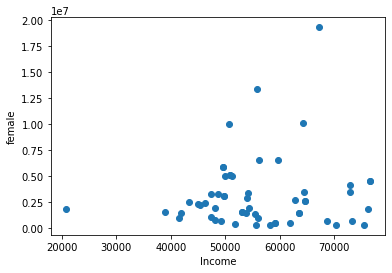

In [9]:
# Use matplotlib to make a scatterplot!
x=us_census["Income"]
y=us_census["female"]
plt.scatter(x,y)
plt.xlabel("Income")
plt.ylabel("female")
plt.show()

In [10]:
#Did you get an error? These monstrous csv files probably have nan values in them! 
#Print out your column with the number of women per state to see.
female_na_values = us_census["female"][us_census["female"].isnull()]
print(female_na_values)

23   NaN
24   NaN
31   NaN
Name: female, dtype: float64


In [11]:
# We can fill in those nans by using pandas’ .fillna() function.
#You have the TotalPop per state, and you have the Men per state. 
#As an estimate for the nan values in the Women column,
#you could use the TotalPop of that state minus the Men for that state.

total_pop=us_census["TotalPop"]-us_census["Male"]
us_census['female']=us_census['female'].fillna(value= total_pop)

In [12]:
# We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.
# Drop those duplicates using the .drop_duplicates() function.
duplicated_row = us_census[us_census.duplicated()]
us_census.drop_duplicates(keep='first',inplace=True)

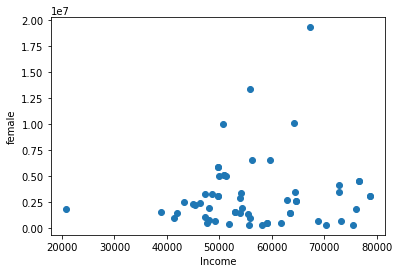

In [13]:
# Make the scatterplot again. Now, it should be perfect! 
# Your job is secure, for now.


plt.scatter(x,y)
plt.xlabel("Income")
plt.ylabel("female")
plt.show()


In [14]:
us_census.dtypes

State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income       float64
GenderPop     object
female       float64
Male           int64
dtype: object

In [15]:
# Try to make a histogram for each one!
# You will have to get the columns into numerical format, 
# and those percentage signs will have to go.
#Don’t forget to fill the nan values with something that makes sense!
#You probably dropped the duplicate rows when making your last graph,
#but it couldn’t hurt to check for duplicates again.

Hispanic    None
White       None
Black       None
Native      None
Asian       None
Pacific     None
dtype: object

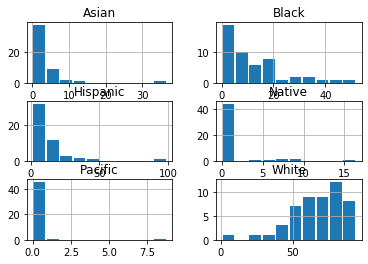

In [16]:
us_census = us_census.replace('%*','',regex=True)
us_census[["Hispanic","White","Black","Native","Asian","Pacific"]] =us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].apply(pd.to_numeric)
us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].fillna(0)
histogram_display =us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].hist(rwidth=0.87)
us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].apply(lambda x :x.drop_duplicates(keep=False,inplace=True))